In [18]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]


cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4 1]
 [1 4]]


In [19]:

# tn, fp, fn, tp = cm.ravel()

tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

accuracy = (tp + tn) / (tp + tn + fp + fn)

precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# Recall (Sensitivity)
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

error_rate = (fp + fn) / (tp + tn + fp + fn)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score:2f}")
print(f"Error Rate: {error_rate}")

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.800000
Error Rate: 0.2


In [43]:
import pandas as pd
import kagglehub as kh
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [27]:
path = kh.dataset_download("somya2115/placement-csv")
database = pd.read_csv(f"{path}/placement.csv")
database = database.drop("Unnamed: 0", axis=1)
database.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [40]:
x = database.drop("placement",axis=1)
y = database ["placement"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)


In [41]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.88

In [46]:
cf = confusion_matrix(y_true=y_test, y_pred= lr.predict(x_test))

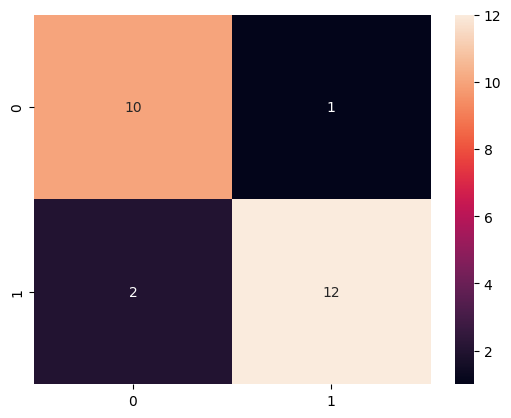

In [48]:
sns.heatmap(data=cf , annot=True)
plt.show()

In [51]:
print(recall_score(y_true=y_test, y_pred= lr.predict(x_test))*100)
print(precision_score(y_true=y_test, y_pred= lr.predict(x_test))*100)
print(f1_score(y_true=y_test, y_pred= lr.predict(x_test))*100)

85.71428571428571
92.3076923076923
88.88888888888889


## Confusion Matrix: Overview & Metrics

A **confusion matrix** is a table used to evaluate the performance of a classification algorithm by comparing predicted and actual labels.

---

### Structure of a Confusion Matrix

|                      | **Predicted Positive** | **Predicted Negative** |
|----------------------|:---------------------:|:---------------------:|
| **Actual Positive**  | True Positive (**TP**) | False Negative (**FN**)|
| **Actual Negative**  | False Positive (**FP**)| True Negative (**TN**) |

---

### Terminology

- **True Positive (TP):** Model correctly predicts positive class.
- **True Negative (TN):** Model correctly predicts negative class.
- **False Positive (FP):** Model incorrectly predicts positive (Type I error).
- **False Negative (FN):** Model incorrectly predicts negative (Type II error).

---

### Key Metrics

- **Accuracy:**  
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$

- **Precision:**  
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$

- **Recall (Sensitivity):**  
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$

- **F1 Score:**  
    $$
    \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$

- **Error Rate:**  
    $$
    \text{Error Rate} = \frac{FP + FN}{TP + TN + FP + FN}
    $$
- **Type I Error (False Positive):** Predicting positive when it's actually negative.  
    *Example:* Diagnosing a healthy patient as sick.

- **Type II Error (False Negative):** Predicting negative when it's actually positive.  
    *Example:* Missing a disease in a sick patient.
- **Which error is more dangerous?**  
    It depends on context:
    - **Type I Error (False Positive):** More serious if unnecessary action is harmful (e.g., treating a healthy patient).
    - **Type II Error (False Negative):** More serious if missing a condition is risky (e.g., missing a disease).

    - **Which error matters more?**  
        The priority depends on the real-world consequences in the specific application.

    **Difference between Precision and Recall:**  
    - **Precision** measures how many of the predicted positives are actually positive. It answers: *Of all items labeled as positive, how many are truly positive?*
    - **Recall** measures how many of the actual positives are correctly identified. It answers: *Of all actual positive items, how many did we correctly label as positive?*
    - ***High precision means fewer false positives, while high recall means fewer false negatives. The balance between them depends on the application.***
    ---

> The confusion matrix provides insight into the types of errors made by a classifier and is especially valuable for imbalanced datasets.